In [1]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('../stat_analysis/data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
scores=np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [6]:
scores_df=pd.DataFrame({'scores':scores},
                       index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                                       name='student'))
scores_df

,scores
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [7]:
#평균값 구하기1
sum(scores)/len(scores)

55.000

In [8]:
#평균값 구하기2
np.mean(scores)

55.000

In [9]:
#평균값 구하기3
scores_df.mean()

scores    55.0
dtype: float64

In [14]:
#중앙값 구하기
#정렬 먼저
sorted_scores=np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [15]:
n=len(sorted_scores)
if n%2==0:   #데이터의 개수가 짝수인 경우
    m0=sorted_scores[n//2 -1]
    m1=sorted_scores[n//2]
    median=(m0+m1)/2
else:        #데이터의 개수가 홀수인 경우
    median=sorted_scores[(n+1)//2 -1]
median

56.500

In [16]:
np.median(scores)

56.500

In [17]:
scores_df.median()

scores    56.5
dtype: float64

In [20]:
#최빈값
pd.Series([1, 1, 1, 2, 2, 3]).mode()    #mode()를 사용하면 최빈값 알 수 있음

0    1
dtype: int64

In [21]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [22]:
#편차
mean=np.mean(scores)
deviation=scores-mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [23]:
another_scores=[50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean=np.mean(another_scores)
another_deviation=another_scores-another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [24]:
np.mean(deviation)    #편차 평균은 0

0.000

In [25]:
np.mean(another_deviation) 

0.000

In [26]:
summary_df=scores_df.copy()
summary_df['deviation']=deviation
summary_df

,scores,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [27]:
summary_df.mean()

scores       55.0
deviation     0.0
dtype: float64

In [28]:
#분산
np.mean(deviation**2)

86.000

In [31]:
np.var(scores)    #var 메서드 쓰면 분산이 나옴

86.000

In [34]:
#numpy는 표본분산을 씀
#pandas는 불편분산을 씀
scores_df.var()

scores    95.555556
dtype: float64

In [35]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,scores,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [36]:
summary_df.mean()

scores                 55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [40]:
#표준편차-> 분산 값은 크니까 분산에 루트 씌움
np.sqrt(np.var(scores, ddof=0))    #ddof=0은 표준 분산

9.274

In [41]:
np.std(scores, ddof=0)   #numpy에서 std를 이용하면 표준편차가 나옴

9.274

In [42]:
#범위
np.max(scores)-np.min(scores)

np.int64(28)

In [44]:
scores_Q1=np.percentile(scores, 25)
scores_Q3=np.percentile(scores, 75)
scores_IQR=scores_Q3-scores_Q1
scores_IQR

15.000

In [46]:
pd.Series(scores).describe()    #지금까지 pd에 담은 것을 describe메서드를 이용하여 한번에 파악

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [54]:
#표준화=(데이터-평균)/표준편차
z=(scores-np.mean(scores))/np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [51]:
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

In [53]:
z=50+10*(scores-np.mean(scores))/np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [55]:
scores_df['deviation'] = z
scores_df

,scores,deviation
student,,
A,42,-1.401826
B,69,1.509659
C,56,0.107833
D,41,-1.509659
E,57,0.215666
F,48,-0.754829
G,65,1.078328
H,49,-0.646997
I,65,1.078328


In [57]:
#50명의 영어 점수 array
english_scores=np.array(df['english'])
#Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [60]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [61]:
#0~10, 10~20, ...이라는 문자열의 리스트를 작성
freq_class=[f'{i}~{i+10}' for i in range(0, 100, 10)]
#freq_class를 인덱스로 DataFrame을 작성
freq_dist_df=pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [63]:
class_value=[(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [64]:
rel_freq=freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [68]:
cum_rel_freq=np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [74]:
freq_dist_df['class value']=class_value
freq_dist_df['relative frequency']=rel_freq
freq_dist_df['cumulative relative frequency']=cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 
                             'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [75]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

np.int64(65)

In [76]:
#히스토그램
#Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

#그래프가 notebook 위에 표시
%matplotlib inline

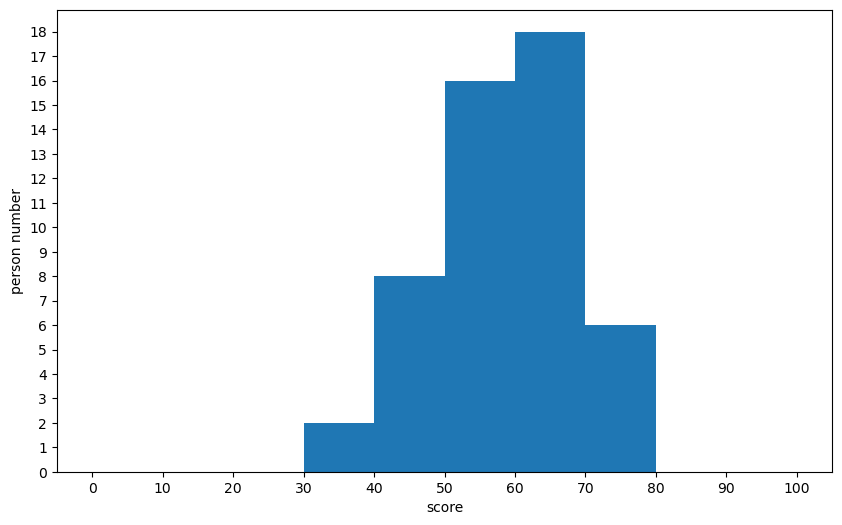

In [78]:
#캔버스를 생성
#figsize로 가로/세로 크기를 지정
fig=plt.figure(figsize=(10, 6))
#캔버스 위에 그래프를 그리기 위한 영역을 지정
#인수는 영역을 1x1개 지정. 하나의 영역에 그린다는 것을 의미
ax=fig.add_subplot(111)

#계급수를 10으로 하여 히스토그램을 그림
freq, _, _=ax.hist(english_scores, bins=10, range=(0, 100))
#x축에 레이블 부여
ax.set_xlabel('score')
#y축에 레이블 부여
ax.set_ylabel('person number')
#x축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
#y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1))
#그래프 표시
plt.show()